# Utils

In [2]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import operator
from functools import reduce #python 3
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import re
from sklearn.cross_validation import StratifiedKFold
import os      # change folder
import pickle

import pandas as pd
import numpy as np

import sklearn
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score

# svm
from sklearn.linear_model import SGDClassifier

# grid search
from sklearn.grid_search import GridSearchCV
from pprint import pprint
from time import time
import pandas as pd

import re
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from gensim.models import Word2Vec    
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.keyedvectors import KeyedVectors

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models import doc2vec

from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re
from ast import literal_eval
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score


/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored cl

In [25]:
def convert_pred_baseline(x):
    if x == -1:
        return "label_negative"
    elif x == 0:
        return "label_neutral"
    elif x == 1:
        return "label_positive"

In [28]:
def convert_label(x):
    if x == "negative":
        return "label_negative"
    elif x == "neutral":
        return "label_neutral"
    elif x =="positive": #row 521 and 554
        return "label_positive"


# Preprocessing

In [3]:
path = "/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/data/labeled data/FinancialPhraseBank-v1.0/"


file_all = open(path+"Sentences_AllAgree.txt", "r",encoding="ISO-8859-1")
file_75 = open(path+"Sentences_75Agree.txt", "r",encoding="ISO-8859-1")
file_66 = open(path+"Sentences_66Agree.txt", "r",encoding="ISO-8859-1")
file_50 = open(path+"Sentences_50Agree.txt", "r",encoding="ISO-8859-1")
doclist_all = [ line for line in file_all ]
doclist_75 = [ line for line in file_75 ]
doclist_66 = [ line for line in file_66 ]
doclist_50 = [ line for line in file_50 ]


In [4]:
doclist_all[0]

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .@neutral\n'

In [5]:
doclist_75[0]

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .@neutral\n'

In [6]:
df_all = pd.DataFrame(data=doclist_all)
df_all.columns = ["sentence"]
df_all.shape

(2264, 1)

In [7]:
df_75 = pd.DataFrame(data=doclist_75)
df_75.columns = ["sentence"]
df_75.shape

(3453, 1)

In [8]:
df_66 = pd.DataFrame(data=doclist_66)
df_66.columns = ["sentence"]
df_66.shape

(4217, 1)

In [9]:
df_50 = pd.DataFrame(data=doclist_50)
df_50.columns = ["sentence"]
df_50.shape

(4846, 1)

In [10]:
df_all.shape

(2264, 1)

In [11]:
df_75.shape

(3453, 1)

In [12]:
df_66.shape

(4217, 1)

In [13]:
#df = pd.concat([df_all,df_75,df_66])
#we use the sentences on which at least 66% of experts agree
df = df_66
df.head()

,sentence
0,"According to Gran , the company has no plans t..."
1,Technopolis plans to develop in stages an area...
2,With the new production plant the company woul...
3,According to the company 's updated strategy f...
4,"For the last quarter of 2010 , Componenta 's n..."


In [14]:
df = df.reset_index(drop=True)
df.head()

,sentence
0,"According to Gran , the company has no plans t..."
1,Technopolis plans to develop in stages an area...
2,With the new production plant the company woul...
3,According to the company 's updated strategy f...
4,"For the last quarter of 2010 , Componenta 's n..."


In [15]:
def extract_label(x):
    result = re.search('.@(.*)\n', x)
    return result.group(1)
def clean(x):
    return x.split('.@')[0]

In [16]:
df["label"] = df["sentence"].apply(extract_label)
df["sentence"] = df["sentence"].apply(clean)
df.head()

,sentence,label
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,With the new production plant the company woul...,positive
3,According to the company 's updated strategy f...,positive
4,"For the last quarter of 2010 , Componenta 's n...",positive


In [17]:
df["label"].value_counts(dropna=False)

neutral     2535
positive    1168
negative     514
Name: label, dtype: int64

In [18]:
df.shape

(4217, 2)

In [19]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.shape

(4211, 2)

In [20]:
df["label"].value_counts(dropna=False)

neutral     2529
positive    1168
negative     514
Name: label, dtype: int64

In [21]:
df.to_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/data/labeled data/FinancialPhraseBank-v1.0/Sentences_AllAgree_preprocessed_baseline.csv",index=False)

In [22]:
df = pd.get_dummies(df, columns=["label"])#,prefix=['publication_name'])
df.head()

,sentence,label_negative,label_neutral,label_positive
0,"According to Gran , the company has no plans t...",0,1,0
1,Technopolis plans to develop in stages an area...,0,1,0
2,With the new production plant the company woul...,0,0,1
3,According to the company 's updated strategy f...,0,0,1
4,"For the last quarter of 2010 , Componenta 's n...",0,0,1


In [23]:
df.to_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/data/labeled data/FinancialPhraseBank-v1.0/Sentences_AllAgree_preprocessed.csv",index=False)

## Lexicon method

In [29]:
malo = pd.read_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/results/sentiment_indices_malo/labelled_sentences_malo_dico.csv")
malo.head()

,Unnamed: 0,sentence,label,pred_dico
0,0,"According to Gran , the company has no plans t...",neutral,0
1,1,Technopolis plans to develop in stages an area...,neutral,0
2,2,With the new production plant the company woul...,positive,1
3,3,According to the company 's updated strategy f...,positive,0
4,4,"For the last quarter of 2010 , Componenta 's n...",positive,-1


In [30]:
malo["pred_dico"] = malo["pred_dico"].apply(convert_pred_baseline)
malo["label"] = malo["label"].apply(convert_label)
malo.head()

,Unnamed: 0,sentence,label,pred_dico
0,0,"According to Gran , the company has no plans t...",label_neutral,label_neutral
1,1,Technopolis plans to develop in stages an area...,label_neutral,label_neutral
2,2,With the new production plant the company woul...,label_positive,label_positive
3,3,According to the company 's updated strategy f...,label_positive,label_neutral
4,4,"For the last quarter of 2010 , Componenta 's n...",label_positive,label_negative


## Baseline TFIDF

In [23]:
# set directory
direct = "/home/RDC/tonneaum/"

# functions


def tokenize(txt):
    """Tokenize by whitespace."""
    return txt.split()


def scores(row):
    """Map textual sentiment categories to numbers in pandas df."""
    if row == "neutral":
        val = 0
    elif row == "positive":
        val = 1
    else:
        val = -1

    return val


def accuracy(pred, actual):
    """Calculate accuracy of predictions."""
    return sum(pred == actual) / len(pred)


# Note: Modified to allow for upsampling, keep original data give indices.
# stackoverflow.com/questions/23455728/scikit-learn-balanced-subsampling

def balanced_subsample(x, y, subsample_size = 1.0, set_seed = None):
    """Create a balanced subsample with upsampling."""
    x = np.asarray(x)
    y = np.asarray(y)
    #len_x = x.shape[0]
    if set_seed is None:
        np.random.seed()
    else:
        np.random.seed(set_seed)

    class_xs = []
    max_elems = None
    ix = np.asarray(list(range(0, len(x))))
    for yi in np.unique(y):
        indx = ix[(y == yi)]
        elems = x[(y == yi)]
        class_xs.append((yi, elems, indx))
        if max_elems is None or elems.shape[0] > max_elems:
            max_elems = elems.shape[0]

    use_elems = max_elems
    if subsample_size < 1:
        use_elems = int(max_elems * subsample_size)

    xs = []
    ys = []
    xx = []

    for ci, this_xs, ix in class_xs:
        n_xs = len(this_xs)
        ix2 = list(range(0, n_xs))
        if n_xs < use_elems:
            diff = use_elems - n_xs
            extr = np.random.choice(ix2, size = diff, replace = True)
            ix = np.append(ix, [ix[i] for i in extr])
            ix2 = np.append(ix2, extr)
            this_xs = [this_xs[i] for i in ix2]

        x_ = this_xs[:use_elems]
        y_ = np.empty(use_elems)
        y_.fill(ci)

        xs.append(x_)
        ys.append(y_)
        xx.append(ix)

    xs = np.concatenate(xs)
    ys = np.concatenate(ys)
    xx = np.concatenate(xx)

    xs = list(xs)
    ys = list(ys)
    xx = list(xx)

    ys = [int(i) for i in ys]

    return xs, ys, xx


def indexer(index1, index2):
    """Return indexed elements of variable."""
    return [index1[i] for i in index2]


def cver(y, x, folds, seed):
    """Stratified k-fold crossvalidation with upsampling."""
    skf = StratifiedKFold(y, n_folds = folds, shuffle = True,
                          random_state = seed)

    ind = np.array(list(range(0, len(x))))

    ind_train, ind_test = [], []
    x_train, x_test = [], []
    y_train, y_test = [], []

    for train_set, test_set in skf:
        x_train.append(x[train_set])
        x_test.append(x[test_set])
        y_train.append(y[train_set])
        y_test.append(y[test_set])
        ind_train.append(ind[train_set])
        ind_test.append(ind[test_set])

    ind_train_tmp, ind_test_tmp = [], []

    # Upsample
    for i in range(0, len(x_train)):
        bal_res = balanced_subsample(x_train[i], y_train[i], set_seed = seed)
        x_train[i] = bal_res[0]
        y_train[i] = bal_res[1]
        ind_train_tmp.append(bal_res[2])

    for i in range(0, len(x_test)):
        bal_res = balanced_subsample(x_test[i], y_test[i], set_seed = seed)
        x_test[i] = bal_res[0]
        y_test[i] = bal_res[1]
        ind_test_tmp.append(bal_res[2])

    # Indices
    custom_cv = []
    for i in range(0, len(ind_train)):
        train_indices = np.array(indexer(list(ind_train[i]), ind_train_tmp[i]))
        test_indices = np.array(indexer(list(ind_test[i]), ind_test_tmp[i]))
        custom_cv.append((train_indices, test_indices))

    return custom_cv


def cv_pred(x, y, custom_cv, piper, unique_y = True):
    """Predict value of model fitted by using cver fct."""
    sub_y = []
    sub_preds = []
    sub_score = []

    for i in range(0, len(custom_cv)):
        train_ind = custom_cv[i][0]
        test_ind = custom_cv[i][1]

        if unique_y is True:
            test_ind = list(set(test_ind))

        x_train_sub = [x[i] for i in train_ind]
        y_train_sub = [y[i] for i in train_ind]

        x_test_sub = [x[i] for i in test_ind]
        y_test_sub = [y[i] for i in test_ind]

        results_sub = piper.fit(x_train_sub, y_train_sub)

        sub_y.extend(y_test_sub)
        sub_preds.extend(results_sub.predict(x_test_sub))
        sub_score.append(results_sub.score(x_test_sub, y_test_sub))

    return sub_score, sub_y, sub_preds


In [24]:
df = pd.read_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/data/labeled data/FinancialPhraseBank-v1.0/Sentences_AllAgree_preprocessed_baseline.csv")

In [25]:
df.shape

(4211, 2)

In [26]:
df["id"] = df.index
df.head()

,sentence,label,id
0,"According to Gran , the company has no plans t...",neutral,0
1,Technopolis plans to develop in stages an area...,neutral,1
2,With the new production plant the company woul...,positive,2
3,According to the company 's updated strategy f...,positive,3
4,"For the last quarter of 2010 , Componenta 's n...",positive,4


In [27]:

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
#STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = text.replace('\n', ' ')
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [28]:
df["sentence"] = df["sentence"].apply(clean_text)
df["label"] = df["label"].apply(scores)
df.columns = ["lemma","sentiment","ident"]

In [29]:
# setup
seed = 123
folds = 5

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["lemma"], df["sentiment"], test_size=0.2, random_state=42)

In [31]:
#undersampling
rus = RandomUnderSampler()
X_train_resampled, y_train_resampled = rus.fit_resample(np.asarray(X_train).reshape(-1,1), y_train)

#X_resampled.tolist()
df_resample = pd.DataFrame(data=[])
df_resample["lemma"] = reduce(operator.concat, X_train_resampled.tolist())
df_resample["sentiment"] = y_train_resampled
df_resample.head()
df_resample.shape
#df_resample["lemma"] = X_resampled
#df.head()

(1269, 2)

In [100]:
X_train.shape

(3368,)

In [94]:
df_resample["sentiment"].value_counts(dropna=False)

 1    423
 0    423
-1    423
Name: sentiment, dtype: int64

In [32]:
#oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
#X_sm,y_sm = smote.fit_sample(X_train,y_train)

In [33]:
from imblearn.pipeline import Pipeline as Pipeline_imblearn
vect = CountVectorizer(tokenizer = tokenize)
tfidf = TfidfTransformer()
smt = SMOTE()
svm = SGDClassifier()

In [34]:
#custom_cv = cver(sco, lem, folds, seed)
piper_baseline = Pipeline([("vect", CountVectorizer(tokenizer = tokenize)),#, ngram_range=(1,2),min_df = 0.0, max_df=0.85)),
                  ("tfidf", TfidfTransformer()),#norm="l2",sublinear_tf=True,use_idf= True)),
                  ("clf", MultinomialNB())])#shuffle = True,n_iter_no_change = 80, random_state = seed,alpha = 0.0001,loss="hinge",penalty="l1"))])


piper_basic = Pipeline([("vect", CountVectorizer(tokenizer = tokenize)),#, ngram_range=(1,2),min_df = 0.0, max_df=0.85)),
                  ("tfidf", TfidfTransformer()),#norm="l2",sublinear_tf=True,use_idf= True)),
                  ("clf", SGDClassifier())])#shuffle = True,n_iter_no_change = 80, random_state = seed,alpha = 0.0001,loss="hinge",penalty="l1"))])

piper_basic_undersample = Pipeline([("vect", CountVectorizer(tokenizer = tokenize)),#, ngram_range=(1,2),min_df = 0.0, max_df=0.85)),
                  ("tfidf", TfidfTransformer()),#norm="l2",sublinear_tf=True,use_idf= True)),
                  ("clf", SGDClassifier())])#shuffle = True,n_iter_no_change = 80, random_state = seed,alpha = 0.0001,loss="hinge",penalty="l1"))])

#piper_basic_undersample = Pipeline([("vect", CountVectorizer(tokenizer = tokenize)),#, ngram_range=(1,2),min_df = 0.0, max_df=0.85)),
#                  ("tfidf", TfidfTransformer()),
#                  ("smote", SMOTE('minority')),
#                  ("clf", SGDClassifier())])#shuffle = True,n_iter_no_change = 80, random_state = seed,alpha = 0.0001,loss="hinge",penalty="l1"))])

piper_basic_smote = Pipeline_imblearn([('vect', vect), ('tfidf', tfidf), ('smt', smt), ('svm', svm)])


piper = Pipeline([("vect", CountVectorizer(tokenizer = tokenize, ngram_range=(1,2),min_df = 0.0, max_df=0.85)),
                  ("tfidf", TfidfTransformer(norm="l2",sublinear_tf=True,use_idf= True)),
                  ("clf", SGDClassifier(shuffle = True,n_iter_no_change = 80, random_state = seed,alpha = 0.0001,loss="hinge",penalty="l1"))])

piper_baseline.fit(X_train,y_train)
piper_basic.fit(X_train,y_train)
piper.fit(X_train,y_train)
piper_basic_undersample.fit(df_resample["lemma"],df_resample["sentiment"])
piper_basic_smote.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000

In [35]:
results_baseline = pd.DataFrame(data = X_test)
results_baseline["pred_baseline"] = piper_baseline.predict(X_test)
results_baseline["pred_gridsearch"] = piper.predict(X_test)
results_baseline["pred_without_gridsearch"] = piper_basic.predict(X_test)
results_baseline["pred_without_gridsearch_undersampling"] = piper_basic_undersample.predict(X_test)
results_baseline["pred_without_gridsearch_smote"] = piper_basic_smote.predict(X_test)

results_baseline["true"] = y_test
results_baseline.head()

,lemma,pred_baseline,pred_gridsearch,pred_without_gridsearch,pred_without_gridsearch_undersampling,pred_without_gridsearch_smote,true
96,in the fourth quarter of 2008 net sales incr...,1,1,1,1,1,1
3305,the contract value amounts to eur 24 million,0,0,0,0,0,0
811,demand for sports equipment was good in 2005,1,1,1,1,1,1
463,tielinja generated net sales of 75 mln euro 9...,0,0,0,-1,0,0
2303,nordic infrastructure construction is one of ...,0,1,1,0,1,0


In [37]:
results_baseline["pred_baseline"] = results_baseline["pred_baseline"].apply(convert_pred_baseline)
results_baseline["pred_gridsearch"] = results_baseline["pred_gridsearch"].apply(convert_pred_baseline)
results_baseline["pred_without_gridsearch"] = results_baseline["pred_without_gridsearch"].apply(convert_pred_baseline)
results_baseline["pred_without_gridsearch_undersampling"] = results_baseline["pred_without_gridsearch_undersampling"].apply(convert_pred_baseline)
results_baseline["pred_without_gridsearch_smote"] = results_baseline["pred_without_gridsearch_smote"].apply(convert_pred_baseline)


results_baseline["true"] = results_baseline["true"].apply(convert_pred_baseline)
results_baseline.head()

,lemma,pred_baseline,pred_gridsearch,pred_without_gridsearch,pred_without_gridsearch_undersampling,pred_without_gridsearch_smote,true
96,in the fourth quarter of 2008 net sales incr...,label_positive,label_positive,label_positive,label_positive,label_positive,label_positive
3305,the contract value amounts to eur 24 million,label_neutral,label_neutral,label_neutral,label_neutral,label_neutral,label_neutral
811,demand for sports equipment was good in 2005,label_positive,label_positive,label_positive,label_positive,label_positive,label_positive
463,tielinja generated net sales of 75 mln euro 9...,label_neutral,label_neutral,label_neutral,label_negative,label_neutral,label_neutral
2303,nordic infrastructure construction is one of ...,label_neutral,label_positive,label_positive,label_neutral,label_positive,label_neutral


# Baseline Word2Vec SVM

In [38]:
# Creating the model and setting values for the various parameters
num_features = 300  # Word vector dimensionality
min_word_count = 40 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words


In [39]:
model = word2vec.Word2Vec(X_train,
                          workers=num_workers,
                          size=num_features,
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
                          #sg=1)

In [40]:
glove2word2vec(glove_input_file="/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/data/glove.6B/glove.6B.300d.txt", word2vec_output_file="/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/data/glove.6B/glove.6B.300d_gensim.txt")


/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(400001, 300)

In [41]:
glove_model = KeyedVectors.load_word2vec_format("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/data/glove.6B/glove.6B.300d_gensim.txt", binary=False)


/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [42]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [43]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [44]:
trainDataVecs = getAvgFeatureVecs(X_train, model, num_features)
trainDataVecs_glove = getAvgFeatureVecs(X_train, glove_model, num_features)


Review 0 of 3368


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Review 1000 of 3368
Review 2000 of 3368
Review 3000 of 3368
Review 0 of 3368


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Review 1000 of 3368
Review 2000 of 3368
Review 3000 of 3368


In [45]:
trainDataVecs = np.nan_to_num(trainDataVecs)
trainDataVecs_glove = np.nan_to_num(trainDataVecs_glove)

In [46]:
X_train_w2v = pd.DataFrame(data=trainDataVecs)
X_train_w2v_glove = pd.DataFrame(data=trainDataVecs_glove)

In [47]:
#do the same with test data
testDataVecs = getAvgFeatureVecs(X_test, model, num_features)
testDataVecs_glove = getAvgFeatureVecs(X_test, glove_model, num_features)

testDataVecs = np.nan_to_num(testDataVecs)
testDataVecs_glove = np.nan_to_num(testDataVecs_glove)

testDataVecs.shape

Review 0 of 843


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Review 0 of 843


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


(843, 300)

In [48]:
X_test_w2v = pd.DataFrame(data=testDataVecs)
X_test_w2v_glove = pd.DataFrame(data=testDataVecs_glove)
#X_test = pd.concat([X_test,X_test_numerical],axis=1, join='inner')


In [81]:
#custom_cv = cver(sco, lem, folds, seed)
svm = SGDClassifier(shuffle = True,n_iter_no_change = 80, random_state = seed,alpha = 0.0001,loss="hinge",penalty="l1")
svm_glove = SGDClassifier(shuffle = True,n_iter_no_change = 80, random_state = seed,alpha = 0.0001,loss="hinge",penalty="l1")

#piper.fit(X_train,y_train)
svm.fit(X_train_w2v,y_train)
svm_glove.fit(X_train_w2v_glove,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=80, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [82]:
results_w2v = pd.DataFrame()
results_w2v["pred_w2v_own"] = svm.predict(X_test_w2v)
results_w2v["pred_w2v_glove"] = svm_glove.predict(X_test_w2v_glove)

results_w2v["true"] = y_test.reset_index(drop=True)
results_w2v["pred_w2v_own"] = results_w2v["pred_w2v_own"].apply(convert_pred_baseline)
results_w2v["pred_w2v_glove"] = results_w2v["pred_w2v_glove"].apply(convert_pred_baseline)

results_w2v["true"] = results_w2v["true"].apply(convert_pred_baseline)
results_w2v.head()

,pred_w2v_own,pred_w2v_glove,true
0,label_positive,label_positive,label_positive
1,label_neutral,label_neutral,label_neutral
2,label_neutral,label_neutral,label_positive
3,label_neutral,label_neutral,label_neutral
4,label_neutral,label_neutral,label_neutral


## Doc2Vec

In [51]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled
#X_train, X_test, y_train, y_test = train_test_split(df.post, df.tags, random_state=0, test_size=0.3)
X_train_d2v = label_sentences(X_train, 'Train')
X_test_d2v = label_sentences(X_test, 'Test')
all_data = X_train_d2v + X_test_d2v

In [52]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 4211/4211 [00:00<00:00, 1382344.38it/s]


In [53]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train_d2v), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test_d2v), 300, 'Test')

In [54]:
X_train_d2v = pd.DataFrame(data=train_vectors_dbow)
#X_train = pd.concat([X_train,X_train_numerical],axis=1, join='inner')
X_train_d2v.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.243082,-0.421254,-0.067798,-0.110481,0.194296,-0.209069,-0.234118,0.184241,-0.117071,0.015671,...,0.022343,0.327679,-0.403393,0.404417,0.433759,-0.282238,0.147642,-0.008491,-0.162306,0.105426
1,0.317659,-0.107203,0.053742,0.213807,0.258256,-0.187761,-0.094771,-0.182280,-0.176917,0.036509,...,-0.078412,0.167401,-0.084214,-0.052379,0.370879,-0.111764,0.020926,-0.028112,-0.174081,0.235861
2,-0.299932,-0.036695,0.224704,-0.100787,-0.132268,0.202017,0.200817,0.072818,-0.090776,0.322539,...,0.265632,-0.175065,0.149694,-0.074967,0.237952,0.286718,-0.168106,0.150708,-0.076198,0.298361
3,0.512408,0.036439,0.352123,0.280292,0.305407,0.205296,-0.043635,-0.115380,0.009875,0.219029,...,0.271719,0.405511,-0.292711,0.251189,0.612658,-0.073128,0.195466,-0.044913,-0.189303,0.102822
4,0.083875,0.061113,0.080137,-0.005720,0.176214,-0.187517,-0.030740,0.012875,0.069211,0.116317,...,0.149453,0.187273,-0.455249,0.041144,0.275725,-0.135241,0.086151,0.057591,0.004610,0.286321


In [55]:
X_test_d2v = pd.DataFrame(data=test_vectors_dbow)
#X_test_d2v = pd.concat([X_test,X_test_numerical],axis=1, join='inner')
X_test_d2v.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.219143,-0.099192,0.558957,-0.132858,0.183631,0.043060,-0.080365,0.098725,0.089734,0.433989,...,-0.242654,0.010953,-0.175703,0.155319,0.331119,-0.211234,0.292069,-0.021032,-0.265379,0.097313
1,-0.115966,0.050153,0.168570,0.175354,0.191160,0.102492,-0.007756,0.028739,0.126345,0.088848,...,-0.194492,0.183283,-0.163729,-0.065686,0.278223,-0.198527,0.267568,0.007334,-0.218901,0.095649
2,0.131773,-0.158197,0.117192,0.054820,-0.057460,-0.002138,-0.005107,-0.153495,0.110613,0.052046,...,-0.222214,-0.086999,-0.151201,0.067929,0.034083,-0.208276,0.055694,0.010715,-0.076389,0.365852
3,-0.182523,-0.146949,0.457299,-0.067236,-0.087892,0.105467,-0.108653,-0.248864,-0.027457,0.058502,...,-0.338691,0.087183,-0.280339,-0.051394,0.316738,-0.232884,0.007797,-0.013439,-0.038338,0.228558
4,0.089113,-0.127911,0.062086,0.440788,0.357802,-0.028190,-0.199707,-0.209402,-0.137321,-0.054873,...,0.089276,-0.039971,0.033985,0.112881,0.364361,0.063297,0.200482,0.071475,-0.070431,0.292735


In [56]:
#custom_cv = cver(sco, lem, folds, seed)
svm = SGDClassifier()#shuffle = True,n_iter_no_change = 80, random_state = seed,alpha = 0.0001,loss="hinge",penalty="l1")

#piper.fit(X_train,y_train)
svm.fit(X_train_d2v,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
results_d2v = pd.DataFrame()
results_d2v["pred"] = svm.predict(X_test_d2v)
results_d2v["true"] = y_test.reset_index(drop=True)
results_d2v["pred"] = results_d2v["pred"].apply(convert_pred_baseline)
results_d2v["true"] = results_d2v["true"].apply(convert_pred_baseline)
results_d2v.head()

,pred,true
0,label_positive,label_positive
1,label_neutral,label_neutral
2,label_positive,label_positive
3,label_neutral,label_neutral
4,label_positive,label_neutral


# BERT results

In [34]:
results = pd.read_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/results/test_malo_sentence_classification_bert.csv")
results.head()

,Unnamed: 0,sentence,pred,pred_proba,true
0,96,"In the fourth quarter of 2008 , net sales incr...","[0.0, 0.0, 1.0]","[0.002733720000833273, 0.002224597381427884, 0...",label_positive
1,3305,The contract value amounts to EUR 2.4 million,"[0.0, 1.0, 0.0]","[0.0025848401710391045, 0.9988908171653748, 0....",label_neutral
2,811,`` Demand for sports equipment was good in 2005,"[0.0, 0.0, 1.0]","[0.002682211110368371, 0.002095094183459878, 0...",label_positive
3,463,Tielinja generated net sales of 7.5 mln euro $...,"[0.0, 1.0, 0.0]","[0.0018911130027845502, 0.9987913966178894, 0....",label_neutral
4,2303,` Nordic infrastructure construction is one of...,"[0.0, 0.0, 1.0]","[0.00022562105732504278, 0.29716378450393677, ...",label_neutral


In [35]:
results.columns = ["id","sentence","pred","pred_proba","true"]
results.head(n=20)

,id,sentence,pred,pred_proba,true
0,96,"In the fourth quarter of 2008 , net sales incr...","[0.0, 0.0, 1.0]","[0.002733720000833273, 0.002224597381427884, 0...",label_positive
1,3305,The contract value amounts to EUR 2.4 million,"[0.0, 1.0, 0.0]","[0.0025848401710391045, 0.9988908171653748, 0....",label_neutral
2,811,`` Demand for sports equipment was good in 2005,"[0.0, 0.0, 1.0]","[0.002682211110368371, 0.002095094183459878, 0...",label_positive
3,463,Tielinja generated net sales of 7.5 mln euro $...,"[0.0, 1.0, 0.0]","[0.0018911130027845502, 0.9987913966178894, 0....",label_neutral
4,2303,` Nordic infrastructure construction is one of...,"[0.0, 0.0, 1.0]","[0.00022562105732504278, 0.29716378450393677, ...",label_neutral
5,2751,"The contract includes design , construction , ...","[0.0, 1.0, 0.0]","[0.0018456578254699707, 0.9988092184066772, 0....",label_neutral
6,2245,The money will be spread mainly over 2011 and ...,"[0.0, 1.0, 0.0]","[0.0018325853161513805, 0.9987443685531616, 0....",label_neutral
7,862,The company negotiated an amendment to the fin...,"[0.0, 1.0, 0.0]","[0.0013752824161201715, 0.9986897110939026, 0....",label_neutral
8,2827,The number of class A shares remains unchanged...,"[0.0, 1.0, 0.0]","[0.0012832357315346599, 0.998754620552063, 0.0...",label_neutral
9,3025,"After the sale , Outokumpu 's share of the tec...","[0.0, 1.0, 0.0]","[0.002444295911118388, 0.9983956217765808, 0.0...",label_neutral


In [36]:
def convert_pred(x):
    if x[1] == "1":
        return "label_negative"
    elif x[6] == "1":
        return "label_neutral"
    elif x[11] == "1":
        return "label_positive"
    else: #row 521 and 554
        return "no label"


In [37]:
def convert_pred_proba(x):
    if x == 0:
        return "label_negative"
    elif x == 1:
        return "label_neutral"
    elif x == 2:
        return "label_positive"
    else: #row 521 and 554
        return "no label"


In [38]:
results["pred"] = results["pred"].apply(convert_pred)

In [39]:
results["pred_proba"] = results["pred_proba"].apply(literal_eval)
results["sum_proba"] = results["pred_proba"].apply(sum)
results["pred_proba"] = results["pred_proba"].apply(np.argmax)
results.head()

,id,sentence,pred,pred_proba,true,sum_proba
0,96,"In the fourth quarter of 2008 , net sales incr...",label_positive,2,label_positive,1.003774
1,3305,The contract value amounts to EUR 2.4 million,label_neutral,1,label_neutral,1.002591
2,811,`` Demand for sports equipment was good in 2005,label_positive,2,label_positive,1.003398
3,463,Tielinja generated net sales of 7.5 mln euro $...,label_neutral,1,label_neutral,1.002165
4,2303,` Nordic infrastructure construction is one of...,label_positive,2,label_neutral,1.139043


In [40]:
results["pred_proba"] = results["pred_proba"].apply(convert_pred_proba)
results.head()

,id,sentence,pred,pred_proba,true,sum_proba
0,96,"In the fourth quarter of 2008 , net sales incr...",label_positive,label_positive,label_positive,1.003774
1,3305,The contract value amounts to EUR 2.4 million,label_neutral,label_neutral,label_neutral,1.002591
2,811,`` Demand for sports equipment was good in 2005,label_positive,label_positive,label_positive,1.003398
3,463,Tielinja generated net sales of 7.5 mln euro $...,label_neutral,label_neutral,label_neutral,1.002165
4,2303,` Nordic infrastructure construction is one of...,label_positive,label_positive,label_neutral,1.139043


In [41]:
results.loc[results["pred"]!=results["pred_proba"]]

,id,sentence,pred,pred_proba,true,sum_proba
47,2494,"HELSINKI , Finland , Sept. 18 , 2009 ( GLOBE N...",label_neutral,label_positive,label_positive,1.351250
561,3656,Managing Director Timo Kohtam+ñki of Lemmink+ñ...,label_neutral,label_positive,label_neutral,1.243281
759,3753,Rautaruukki aims to find work from the group '...,label_negative,label_neutral,label_neutral,1.223250


In [42]:
results["pred_proba"].value_counts(dropna=False)

label_neutral     496
label_positive    256
label_negative     91
Name: pred_proba, dtype: int64

In [43]:
results.head()

,id,sentence,pred,pred_proba,true,sum_proba
0,96,"In the fourth quarter of 2008 , net sales incr...",label_positive,label_positive,label_positive,1.003774
1,3305,The contract value amounts to EUR 2.4 million,label_neutral,label_neutral,label_neutral,1.002591
2,811,`` Demand for sports equipment was good in 2005,label_positive,label_positive,label_positive,1.003398
3,463,Tielinja generated net sales of 7.5 mln euro $...,label_neutral,label_neutral,label_neutral,1.002165
4,2303,` Nordic infrastructure construction is one of...,label_positive,label_positive,label_neutral,1.139043


## BERT Large results

In [44]:
results_large = pd.read_csv("/Users/manueltonneau/Documents/Humboldt/Second semester/Master thesis/results/test_malo_sentence_classification_bert_large.csv")
results_large.head()

,Unnamed: 0,sentence,pred,pred_proba,true
0,96,"In the fourth quarter of 2008 , net sales incr...","[0.0, 0.0, 1.0]","[0.07034596800804138, 0.039265722036361694, 0....",label_positive
1,3305,The contract value amounts to EUR 2.4 million,"[0.0, 1.0, 0.0]","[0.014253164641559124, 0.9578186273574829, 0.0...",label_neutral
2,811,`` Demand for sports equipment was good in 2005,"[0.0, 0.0, 1.0]","[0.04201382398605347, 0.07096993923187256, 0.9...",label_positive
3,463,Tielinja generated net sales of 7.5 mln euro $...,"[0.0, 1.0, 0.0]","[0.026005534455180168, 0.9632948040962219, 0.0...",label_neutral
4,2303,` Nordic infrastructure construction is one of...,"[0.0, 0.0, 1.0]","[0.02008826471865177, 0.22700658440589905, 0.8...",label_neutral


In [45]:
results_large.columns = ["id","sentence","pred","pred_proba","true"]
results_large.head(n=20)

,id,sentence,pred,pred_proba,true
0,96,"In the fourth quarter of 2008 , net sales incr...","[0.0, 0.0, 1.0]","[0.07034596800804138, 0.039265722036361694, 0....",label_positive
1,3305,The contract value amounts to EUR 2.4 million,"[0.0, 1.0, 0.0]","[0.014253164641559124, 0.9578186273574829, 0.0...",label_neutral
2,811,`` Demand for sports equipment was good in 2005,"[0.0, 0.0, 1.0]","[0.04201382398605347, 0.07096993923187256, 0.9...",label_positive
3,463,Tielinja generated net sales of 7.5 mln euro $...,"[0.0, 1.0, 0.0]","[0.026005534455180168, 0.9632948040962219, 0.0...",label_neutral
4,2303,` Nordic infrastructure construction is one of...,"[0.0, 0.0, 1.0]","[0.02008826471865177, 0.22700658440589905, 0.8...",label_neutral
5,2751,"The contract includes design , construction , ...","[0.0, 1.0, 0.0]","[0.01634831540286541, 0.9641873240470886, 0.03...",label_neutral
6,2245,The money will be spread mainly over 2011 and ...,"[0.0, 1.0, 0.0]","[0.022028401494026184, 0.9647936820983887, 0.0...",label_neutral
7,862,The company negotiated an amendment to the fin...,"[0.0, 1.0, 0.0]","[0.020661473274230957, 0.9163827300071716, 0.0...",label_neutral
8,2827,The number of class A shares remains unchanged...,"[0.0, 1.0, 0.0]","[0.029698584228754044, 0.9630138874053955, 0.0...",label_neutral
9,3025,"After the sale , Outokumpu 's share of the tec...","[0.0, 1.0, 0.0]","[0.233189195394516, 0.7380191683769226, 0.0255...",label_neutral


In [46]:
results_large["pred"] = results_large["pred"].apply(convert_pred)

In [47]:
results_large["pred_proba"] = results_large["pred_proba"].apply(literal_eval)
results_large["sum_proba"] = results_large["pred_proba"].apply(sum)
results_large["pred_proba"] = results_large["pred_proba"].apply(np.argmax)
results_large.head()

,id,sentence,pred,pred_proba,true,sum_proba
0,96,"In the fourth quarter of 2008 , net sales incr...",label_positive,2,label_positive,1.068760
1,3305,The contract value amounts to EUR 2.4 million,label_neutral,1,label_neutral,1.014793
2,811,`` Demand for sports equipment was good in 2005,label_positive,2,label_positive,1.042523
3,463,Tielinja generated net sales of 7.5 mln euro $...,label_neutral,1,label_neutral,1.021413
4,2303,` Nordic infrastructure construction is one of...,label_positive,2,label_neutral,1.075301


In [48]:
results_large["pred_proba"] = results_large["pred_proba"].apply(convert_pred_proba)
results_large.head()

,id,sentence,pred,pred_proba,true,sum_proba
0,96,"In the fourth quarter of 2008 , net sales incr...",label_positive,label_positive,label_positive,1.068760
1,3305,The contract value amounts to EUR 2.4 million,label_neutral,label_neutral,label_neutral,1.014793
2,811,`` Demand for sports equipment was good in 2005,label_positive,label_positive,label_positive,1.042523
3,463,Tielinja generated net sales of 7.5 mln euro $...,label_neutral,label_neutral,label_neutral,1.021413
4,2303,` Nordic infrastructure construction is one of...,label_positive,label_positive,label_neutral,1.075301


# Results comparison

In [31]:
malo.head()

,Unnamed: 0,sentence,label,pred_dico
0,0,"According to Gran , the company has no plans t...",label_neutral,label_neutral
1,1,Technopolis plans to develop in stages an area...,label_neutral,label_neutral
2,2,With the new production plant the company woul...,label_positive,label_positive
3,3,According to the company 's updated strategy f...,label_positive,label_neutral
4,4,"For the last quarter of 2010 , Componenta 's n...",label_positive,label_negative


In [32]:
#Lexicon method
accuracy_score(malo["label"], malo["pred_dico"])

0.6483281953995732

In [70]:
#Baseline: TFIDF Naive Bayes without gridsearch
accuracy_score(results_baseline["true"], results_baseline["pred_baseline"])

0.7022538552787663

In [71]:
# TFIDF SVM without gridsearch
accuracy_score(results_baseline["true"], results_baseline["pred_without_gridsearch"])

0.8090154211150652

In [72]:
# TFIDF SVM with gridsearch
accuracy_score(results_baseline["true"], results_baseline["pred_gridsearch"])

0.8291814946619217

In [73]:
# TFIDF SVM without gridsearch, undersampling
accuracy_score(results_baseline["true"], results_baseline["pred_without_gridsearch_undersampling"])

0.697508896797153

In [74]:
# TFIDF SVM without gridsearch, oversampling
accuracy_score(results_baseline["true"], results_baseline["pred_without_gridsearch_smote"])

0.8078291814946619

In [83]:
# Word2vec own SVM
accuracy_score(results_w2v["true"], results_w2v["pred_w2v_own"])

0.6168446026097272

In [84]:
# Word2vec pre-trained SVM
accuracy_score(results_w2v["true"], results_w2v["pred_w2v_glove"])

0.6215895610913404

In [77]:
# Doc2Vec
accuracy_score(results_d2v["true"], results_d2v["pred"])

0.7532621589561092

In [49]:
#BERT base
accuracy_score(results["true"], results["pred_proba"])

0.8979833926453143

In [50]:
#BERT large
accuracy_score(results_large["true"], results_large["pred_proba"])

0.896797153024911

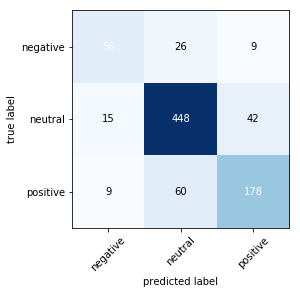

In [89]:
cm = confusion_matrix(y_target=results_baseline["true"], 
                      y_predicted=results_baseline["pred_without_gridsearch"], 
                      binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm,class_names=["negative", "neutral", "positive"])
plt.show()

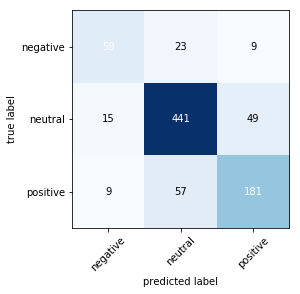

In [93]:
cm = confusion_matrix(y_target=results_baseline["true"], 
                      y_predicted=results_baseline["pred_without_gridsearch_smote"], 
                      binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm,class_names=["negative", "neutral", "positive"])
plt.show()

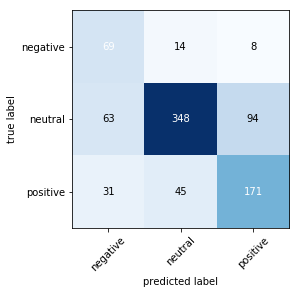

In [92]:
cm = confusion_matrix(y_target=results_baseline["true"], 
                      y_predicted=results_baseline["pred_without_gridsearch_undersampling"], 
                      binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm,class_names=["negative", "neutral", "positive"])
plt.show()

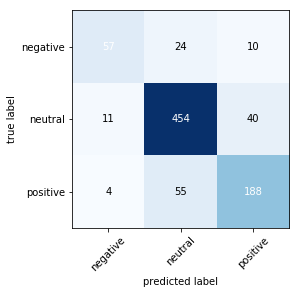

In [91]:
cm = confusion_matrix(y_target=results_baseline["true"], 
                      y_predicted=results_baseline["pred_gridsearch"], 
                      binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm,class_names=["negative", "neutral", "positive"])
plt.show()

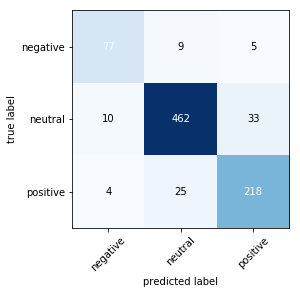

In [85]:
cm = confusion_matrix(y_target=results["true"], 
                      y_predicted=results["pred_proba"], 
                      binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm,class_names=["negative", "neutral", "positive"])
plt.show()

### Precision

In [108]:
#precision SVM without gridsearch
precision_score(results_baseline["true"], results_baseline["pred_without_gridsearch"], average=None,labels=["label_negative","label_neutral","label_positive"])

array([0.7       , 0.83895131, 0.77729258])

In [109]:
#undersampling
precision_score(results_baseline["true"], results_baseline["pred_without_gridsearch_undersampling"], average=None,labels=["label_negative","label_neutral","label_positive"])

array([0.42331288, 0.85503686, 0.62637363])

In [110]:
#oversampling
precision_score(results_baseline["true"], results_baseline["pred_without_gridsearch_smote"], average=None,labels=["label_negative","label_neutral","label_positive"])

array([0.71084337, 0.84644914, 0.75732218])

In [112]:
#with gridsearch
precision_score(results_baseline["true"], results_baseline["pred_gridsearch"], average=None,labels=["label_negative","label_neutral","label_positive"])

array([0.79166667, 0.85178236, 0.78991597])

In [113]:
#with BERT
precision_score(results["true"], results["pred_proba"], average=None,labels=["label_negative","label_neutral","label_positive"])

array([0.84615385, 0.93145161, 0.8515625 ])

### Recall

In [102]:
#recall SVM without gridsearch
recall_score(results_baseline["true"], results_baseline["pred_without_gridsearch"], average=None,labels=["label_negative","label_neutral","label_positive"])

array([0.61538462, 0.88712871, 0.72064777])

In [103]:
#undersampling
recall_score(results_baseline["true"], results_baseline["pred_without_gridsearch_undersampling"], average=None,labels=["label_negative","label_neutral","label_positive"])

array([0.75824176, 0.68910891, 0.69230769])

In [104]:
#oversampling
recall_score(results_baseline["true"], results_baseline["pred_without_gridsearch_smote"], average=None,labels=["label_negative","label_neutral","label_positive"])

array([0.64835165, 0.87326733, 0.73279352])

In [114]:
#with gridsearch
recall_score(results_baseline["true"], results_baseline["pred_gridsearch"], average=None,labels=["label_negative","label_neutral","label_positive"])

array([0.62637363, 0.8990099 , 0.7611336 ])

In [115]:
#with BERT
recall_score(results["true"], results["pred_proba"], average=None,labels=["label_negative","label_neutral","label_positive"])

array([0.84615385, 0.91485149, 0.88259109])